# Sign Game Server

Game Plan:

In [31]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras import models
from tensorflow.keras import Sequential, layers
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
import string

In [32]:
from sign_game.ml.evaluate import evaluate_model

In [33]:
!pip list | grep sign_game

protobuf 3.11.0

## Dataset Preprocessing

In [79]:
# Dataset
df1 = pd.read_csv('../raw_data/csv_data/train.csv')
df2 = pd.read_csv('../raw_data/csv_data/test.csv')

In [80]:
df = df1.copy().dropna().reset_index()
test_df = df2.copy().dropna().reset_index()

In [81]:
df.columns

Index(['index', 'Unnamed: 0', 'WRIST_X', 'WRIST_Y', 'WRIST_Z', 'THUMB_CMC_X',
       'THUMB_CMC_Y', 'THUMB_CMC_Z', 'THUMB_MCP_X', 'THUMB_MCP_Y',
       'THUMB_MCP_Z', 'THUMB_IP_X', 'THUMB_IP_Y', 'THUMB_IP_Z', 'THUMB_TIP_X',
       'THUMB_TIP_Y', 'THUMB_TIP_Z', 'INDEX_FINGER_MCP_X',
       'INDEX_FINGER_MCP_Y', 'INDEX_FINGER_MCP_Z', 'INDEX_FINGER_PIP_X',
       'INDEX_FINGER_PIP_Y', 'INDEX_FINGER_PIP_Z', 'INDEX_FINGER_DIP_X',
       'INDEX_FINGER_DIP_Y', 'INDEX_FINGER_DIP_Z', 'INDEX_FINGER_TIP_X',
       'INDEX_FINGER_TIP_Y', 'INDEX_FINGER_TIP_Z', 'MIDDLE_FINGER_MCP_X',
       'MIDDLE_FINGER_MCP_Y', 'MIDDLE_FINGER_MCP_Z', 'MIDDLE_FINGER_PIP_X',
       'MIDDLE_FINGER_PIP_Y', 'MIDDLE_FINGER_PIP_Z', 'MIDDLE_FINGER_DIP_X',
       'MIDDLE_FINGER_DIP_Y', 'MIDDLE_FINGER_DIP_Z', 'MIDDLE_FINGER_TIP_X',
       'MIDDLE_FINGER_TIP_Y', 'MIDDLE_FINGER_TIP_Z', 'RING_FINGER_MCP_X',
       'RING_FINGER_MCP_Y', 'RING_FINGER_MCP_Z', 'RING_FINGER_PIP_X',
       'RING_FINGER_PIP_Y', 'RING_FINGER_PIP_Z', 'RI

In [82]:
X_test = test_df.drop(columns=['index', 'Unnamed: 0', 'PATH', 'TARGET'])
X_train = df.drop(columns=['index', 'Unnamed: 0', 'PATH', 'TARGET'])
display(X_test)
display(X_train)

,WRIST_X,WRIST_Y,WRIST_Z,THUMB_CMC_X,THUMB_CMC_Y,THUMB_CMC_Z,THUMB_MCP_X,THUMB_MCP_Y,THUMB_MCP_Z,THUMB_IP_X,...,PINKY_MCP_Z,PINKY_PIP_X,PINKY_PIP_Y,PINKY_PIP_Z,PINKY_DIP_X,PINKY_DIP_Y,PINKY_DIP_Z,PINKY_TIP_X,PINKY_TIP_Y,PINKY_TIP_Z
0,0.580146,0.730645,-1.177116e-06,0.473765,0.671982,-0.048995,0.387580,0.538928,-0.069621,0.441531,...,-0.059356,0.695745,0.415271,-0.096098,0.671739,0.495591,-0.073339,0.664304,0.510604,-0.047599
1,0.445952,0.761564,-5.865483e-07,0.341784,0.663544,-0.049271,0.302874,0.512108,-0.071219,0.395074,...,-0.054139,0.649678,0.354256,-0.068198,0.641034,0.366634,-0.072729,0.621034,0.409713,-0.072052
2,0.225931,0.832181,1.781775e-06,0.387265,0.749331,0.024833,0.521656,0.661899,0.017178,0.645383,...,-0.064048,0.408083,0.353560,-0.073689,0.495536,0.308308,-0.076379,0.574876,0.282047,-0.078049
3,0.539091,0.918612,-5.109345e-07,0.645941,0.846850,-0.006828,0.677403,0.755252,0.004011,0.601994,...,0.064850,0.389593,0.665900,0.069766,0.418992,0.735415,0.093706,0.444080,0.775207,0.114414
4,0.732511,0.814176,7.756363e-08,0.636504,0.784360,-0.085297,0.522966,0.728116,-0.153700,0.417040,...,-0.126519,0.848234,0.502867,-0.185572,0.827085,0.601483,-0.153147,0.784853,0.626364,-0.114238
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43295,0.741618,0.645042,2.154786e-07,0.770277,0.579488,-0.085343,0.782202,0.506932,-0.149878,0.761967,...,-0.092626,0.578097,0.695811,-0.167554,0.657868,0.686865,-0.172817,0.702142,0.666721,-0.157109
43296,0.137764,0.510845,-2.493652e-07,0.147000,0.370611,-0.053444,0.240493,0.247799,-0.080846,0.355257,...,-0.103268,0.485470,0.565702,-0.180807,0.390456,0.543748,-0.165693,0.316944,0.524513,-0.132549
43297,0.137497,0.557135,-6.068033e-07,0.175437,0.396056,-0.011387,0.259040,0.284953,-0.009870,0.337952,...,-0.038636,0.470347,0.440237,-0.074310,0.396895,0.424846,-0.061589,0.335858,0.431777,-0.037805
43298,0.281278,0.972573,1.029575e-06,0.193043,0.919504,-0.061134,0.130964,0.825261,-0.102737,0.181962,...,-0.113234,0.337720,0.726585,-0.159835,0.281542,0.781124,-0.155015,0.261030,0.821271,-0.138690


,WRIST_X,WRIST_Y,WRIST_Z,THUMB_CMC_X,THUMB_CMC_Y,THUMB_CMC_Z,THUMB_MCP_X,THUMB_MCP_Y,THUMB_MCP_Z,THUMB_IP_X,...,PINKY_MCP_Z,PINKY_PIP_X,PINKY_PIP_Y,PINKY_PIP_Z,PINKY_DIP_X,PINKY_DIP_Y,PINKY_DIP_Z,PINKY_TIP_X,PINKY_TIP_Y,PINKY_TIP_Z
0,0.637210,0.809412,3.020628e-07,0.512774,0.712112,-0.034217,0.458524,0.560906,-0.044048,0.522763,...,-0.049284,0.665756,0.339019,-0.064839,0.651039,0.261719,-0.075527,0.636476,0.196306,-0.086300
1,0.551169,0.491262,2.062316e-06,0.671859,0.519571,-0.147540,0.755878,0.502617,-0.289627,0.763081,...,-0.426825,0.366051,0.368505,-0.551383,0.379163,0.490967,-0.609301,0.404357,0.584193,-0.653821
2,0.686294,0.713084,1.565869e-07,0.572719,0.676401,-0.015456,0.469417,0.611907,-0.038461,0.375150,...,-0.090517,0.577764,0.336889,-0.126363,0.509202,0.300105,-0.146626,0.446786,0.294199,-0.158336
3,0.613139,0.778134,-1.897673e-07,0.491187,0.746994,-0.076983,0.359688,0.653980,-0.116892,0.261926,...,-0.058633,0.703964,0.442102,-0.105841,0.683945,0.520048,-0.077680,0.682067,0.547024,-0.043198
4,0.506356,0.615224,3.498056e-07,0.438446,0.587186,-0.102750,0.351638,0.539882,-0.180144,0.252407,...,-0.072659,0.606038,0.308292,-0.097601,0.578553,0.248617,-0.109266,0.537409,0.210431,-0.117112
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172624,0.263627,0.535312,1.611651e-06,0.403528,0.515474,-0.044685,0.528242,0.477760,-0.076475,0.636806,...,-0.072697,0.511867,0.300635,-0.104773,0.586523,0.267756,-0.125436,0.653001,0.246486,-0.139497
172625,0.511463,0.861062,-6.020041e-07,0.422419,0.782233,-0.031144,0.358993,0.701005,-0.049130,0.316516,...,-0.022426,0.669151,0.621616,-0.054109,0.701926,0.587407,-0.057539,0.728264,0.546679,-0.052590
172626,0.388389,0.807437,-1.529737e-06,0.297456,0.727686,-0.032727,0.267988,0.594614,-0.051199,0.319311,...,-0.038180,0.462980,0.431043,-0.044108,0.438205,0.470834,-0.030186,0.426073,0.528956,-0.021680
172627,0.646333,0.695424,-4.513188e-07,0.534227,0.634776,-0.003656,0.461395,0.557774,-0.019350,0.403825,...,-0.072576,0.643492,0.271827,-0.086607,0.615850,0.193169,-0.093982,0.581839,0.125560,-0.097428


In [98]:
y_test=test_df['TARGET']
y_train=df['TARGET']
display(y_train)
display(y_test)

0         B
1         M
2         C
3         T
4         C
         ..
172624    Q
172625    Y
172626    E
172627    F
172628    I
Name: TARGET, Length: 172629, dtype: object

0        S
1        E
2        C
3        X
4        L
        ..
43295    Z
43296    G
43297    G
43298    V
43299    C
Name: TARGET, Length: 43300, dtype: object

In [99]:
display(y_train.value_counts())
display(y_test.value_counts())

L    7735
F    7616
D    7488
K    7311
B    7252
E    7213
R    7153
A    7101
I    7080
Z    7006
V    6897
X    6897
W    6863
O    6854
Y    6698
J    6682
S    6674
C    6615
T    6459
G    6396
H    6077
U    5546
M    5434
P    5411
Q    5192
N    4979
Name: TARGET, dtype: int64

F    1911
K    1875
L    1873
D    1860
Z    1829
E    1810
X    1793
B    1774
R    1771
A    1764
I    1740
Y    1735
W    1715
O    1706
V    1701
T    1689
C    1681
J    1665
G    1629
S    1627
H    1530
Q    1390
M    1365
U    1347
P    1300
N    1220
Name: TARGET, dtype: int64

In [100]:
# Encoding letters to numerical, A-Z = 0-25
y_train = pd.Categorical(y_train)
y_test = pd.Categorical(y_test)

In [101]:
display(y_train.dtype)
display(y_test.dtype)


CategoricalDtype(categories=['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L',
                  'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X',
                  'Y', 'Z'],
, ordered=False)

CategoricalDtype(categories=['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L',
                  'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X',
                  'Y', 'Z'],
, ordered=False)

In [102]:
cat_list = list(y_train.categories)
display(cat_list)

['A',
 'B',
 'C',
 'D',
 'E',
 'F',
 'G',
 'H',
 'I',
 'J',
 'K',
 'L',
 'M',
 'N',
 'O',
 'P',
 'Q',
 'R',
 'S',
 'T',
 'U',
 'V',
 'W',
 'X',
 'Y',
 'Z']

In [103]:
y_test = y_test.codes
y_train = y_train.codes
display(len(y_train))
display(y_train)
display(len(y_test))
display(y_test)

172629

array([ 1, 12,  2, ...,  4,  5,  8], dtype=int8)

43300

array([18,  4,  2, ...,  6, 21,  2], dtype=int8)

In [104]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((172629, 63, 1), (172629,), (43300, 63, 1), (43300,))

In [105]:
classes = len(cat_list)
print(classes)

26


In [106]:
y_train = to_categorical(y_train, num_classes=classes)
y_train

array([[0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [107]:
y_test = to_categorical(y_test, num_classes=classes)

In [108]:
X_train = np.reshape(np.array(X_train), (X_train.shape[0], X_train.shape[1], 1)).astype(np.float32)
X_test = np.reshape(np.array(X_test), (X_test.shape[0], X_test.shape[1], 1)).astype(np.float32)
print(X_train.shape, X_test.shape)

(172629, 63, 1) (43300, 63, 1)


## CNN Model

### Original CNN

In [49]:
# Architecture
# model = models.Sequential()
# model.add(layers.Conv1D(filters=512, kernel_size=7, strides=1, padding='causal', input_shape=X_train.shape[1:3], activation='relu'))
# model.add(layers.Conv1D(filters=512, kernel_size=7, strides=1, padding='causal', activation='relu'))
# model.add(layers.MaxPooling1D(pool_size=2))
# model.add(layers.Conv1D(filters=256, kernel_size=5, strides=1, padding='causal', activation='relu'))
# model.add(layers.Conv1D(filters=256, kernel_size=5, strides=1, padding='causal', activation='relu'))
# model.add(layers.MaxPooling1D(pool_size=2))
# model.add(layers.Conv1D(filters=256, kernel_size=3, strides=1, padding='causal', activation='relu'))
# model.add(layers.Conv1D(filters=256, kernel_size=3, strides=1, padding='causal', activation='relu'))
# model.add(layers.MaxPooling1D(pool_size=2))
# model.add(layers.Dropout(0.2))
# model.add(layers.Flatten())
# model.add(layers.Dense(256, activation='relu'))
# model.add(layers.Dense(26, activation='softmax')) 
#accuracy: 0.89

### Reduced CNN 1

In [50]:
# model = models.Sequential()
# model.add(layers.Conv1D(filters=64, kernel_size=3, strides=1, padding='causal', input_shape=X_train.shape[1:3], activation='relu'))
# model.add(layers.MaxPooling1D(pool_size=2))
# model.add(layers.Conv1D(filters=64, kernel_size=3, strides=1, padding='causal', activation='relu'))
# model.add(layers.MaxPooling1D(pool_size=2))
# model.add(layers.Conv1D(filters=64, kernel_size=3, strides=1, padding='causal', activation='relu'))
# model.add(layers.MaxPooling1D(pool_size=2))
# model.add(layers.Dropout(0.2))
# model.add(layers.Flatten())
# model.add(layers.Dense(256, activation='relu'))
# model.add(layers.Dense(26, activation='softmax'))
# accuracy: 0.71

### Reduced CNN 2

In [51]:
# model = models.Sequential()
# model.add(layers.Conv1D(filters=32, kernel_size=3, strides=1, padding='causal', input_shape=X_train.shape[1:3], activation='relu'))
# model.add(layers.MaxPooling1D(pool_size=2))
# model.add(layers.Conv1D(filters=64, kernel_size=3, strides=1, padding='causal', activation='relu'))
# model.add(layers.MaxPooling1D(pool_size=2))
# model.add(layers.Conv1D(filters=128, kernel_size=3, strides=1, padding='causal', activation='relu'))
# model.add(layers.MaxPooling1D(pool_size=2))
# model.add(layers.Dropout(0.2))
# model.add(layers.Flatten())
# model.add(layers.Dense(256, activation='relu'))
# model.add(layers.Dense(26, activation='softmax'))
# accuracy: 0.81

### Reduced CNN 3

In [52]:
# model = models.Sequential()
# model.add(layers.Conv1D(filters=64, kernel_size=3, strides=1, padding='causal', input_shape=X_train.shape[1:3], activation='relu'))
# model.add(layers.MaxPooling1D(pool_size=2))
# model.add(layers.Conv1D(filters=128, kernel_size=3, strides=1, padding='causal', activation='relu'))
# model.add(layers.MaxPooling1D(pool_size=2))
# model.add(layers.Conv1D(filters=256, kernel_size=3, strides=1, padding='causal', activation='relu'))
# model.add(layers.MaxPooling1D(pool_size=2))
# model.add(layers.Dropout(0.2))
# model.add(layers.Flatten())
# model.add(layers.Dense(256, activation='relu'))
# model.add(layers.Dense(26, activation='softmax'))
# accuracy: 0.86

### Reduced CNN 4

In [53]:
model = models.Sequential()
model.add(layers.Conv1D(filters=16, kernel_size=3, strides=1, padding='causal', input_shape=X_train.shape[1:3], activation='relu'))
model.add(layers.MaxPooling1D(pool_size=2))
model.add(layers.Conv1D(filters=32, kernel_size=3, strides=1, padding='causal', activation='relu'))
model.add(layers.MaxPooling1D(pool_size=2))
model.add(layers.Conv1D(filters=64, kernel_size=3, strides=1, padding='causal', activation='relu'))
model.add(layers.MaxPooling1D(pool_size=2))
model.add(layers.Dropout(0.2))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(26, activation='softmax'))

In [54]:
model.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [55]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_3 (Conv1D)           (None, 63, 16)            64        
                                                                 
 max_pooling1d_3 (MaxPooling  (None, 31, 16)           0         
 1D)                                                             
                                                                 
 conv1d_4 (Conv1D)           (None, 31, 32)            1568      
                                                                 
 max_pooling1d_4 (MaxPooling  (None, 15, 32)           0         
 1D)                                                             
                                                                 
 conv1d_5 (Conv1D)           (None, 15, 64)            6208      
                                                                 
 max_pooling1d_5 (MaxPooling  (None, 7, 64)           

In [56]:
es = EarlyStopping(patience=1, restore_best_weights=True)

In [57]:
%%time
history = model.fit(X_train, 
                    y_train,
                    epochs=500, 
                    validation_split=0.3, 
                    callbacks=es)

Epoch 1/500
3777/3777 [==============================] - 42s 11ms/step - loss: 0.7536 - accuracy: 0.7719 - val_loss: 0.3112 - val_accuracy: 0.9151
Epoch 2/500
3777/3777 [==============================] - 39s 10ms/step - loss: 0.2926 - accuracy: 0.9138 - val_loss: 0.2100 - val_accuracy: 0.9379
Epoch 3/500
3777/3777 [==============================] - 38s 10ms/step - loss: 0.2188 - accuracy: 0.9340 - val_loss: 0.1704 - val_accuracy: 0.9481
Epoch 4/500
3777/3777 [==============================] - 47s 12ms/step - loss: 0.1874 - accuracy: 0.9430 - val_loss: 0.1501 - val_accuracy: 0.9550
Epoch 5/500
3777/3777 [==============================] - 43s 11ms/step - loss: 0.1659 - accuracy: 0.9487 - val_loss: 0.1379 - val_accuracy: 0.9587
Epoch 6/500
3777/3777 [==============================] - 36s 9ms/step - loss: 0.1506 - accuracy: 0.9523 - val_loss: 0.1330 - val_accuracy: 0.9599
Epoch 7/500
3777/3777 [==============================] - 37s 10ms/step - loss: 0.1412 - accuracy: 0.9547 - val_loss: 0.

In [120]:
%%time
y_pred = model.predict(X_test)
display(y_pred)

1354/1354 [==============================] - 8s 6ms/step


array([[1.0557124e-08, 5.8376333e-12, 1.4637779e-16, ..., 2.2243075e-06,
        2.9823685e-15, 1.1136707e-12],
       [2.3434762e-10, 5.5152008e-11, 2.7179203e-10, ..., 5.6107519e-09,
        5.8193133e-12, 4.9808678e-11],
       [4.3284726e-20, 7.2724919e-17, 9.9839503e-01, ..., 2.2251296e-09,
        9.2515642e-14, 2.4162743e-11],
       ...,
       [2.6753341e-15, 2.0271691e-20, 7.8762552e-12, ..., 6.8333650e-10,
        1.9055424e-11, 3.1266711e-05],
       [1.2476325e-20, 2.2484562e-14, 1.6444434e-11, ..., 2.4435412e-10,
        1.2699757e-12, 1.9831571e-08],
       [3.8974379e-12, 1.1268823e-10, 9.9988818e-01, ..., 4.0927063e-07,
        3.8087775e-10, 5.7627136e-11]], dtype=float32)

CPU times: user 9.22 s, sys: 563 ms, total: 9.78 s
Wall time: 9.79 s


In [121]:
y_pred = np.array([[round(b) for b in a] for a in y_pred]) 
display(y_pred)
display(y_test)

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0]])

array([18,  4,  2, ...,  6, 21,  2])

In [122]:
y_pred = np.argmax(y_pred, axis=1)
y_pred


array([18,  4,  2, ...,  6, 21,  2])

In [112]:
y_test= np.argmax(y_test, axis=1)
y_test


array([18,  4,  2, ...,  6, 21,  2])

In [119]:
y_train

array([ 1, 12,  2, ...,  4,  5,  8])

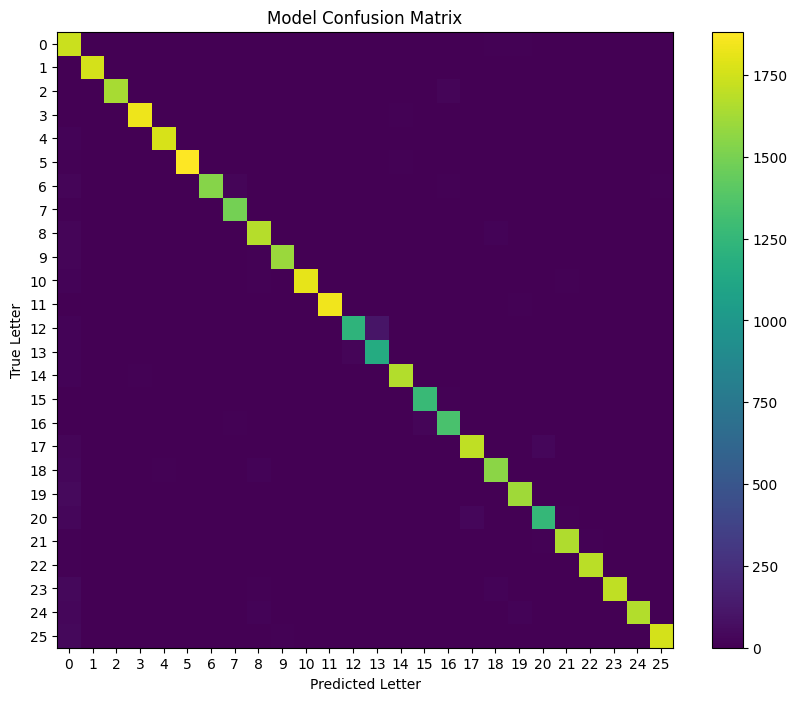

              precision    recall  f1-score   support

           0       0.77      0.98      0.87      1764
           1       0.98      0.99      0.99      1774
           2       0.98      0.97      0.98      1681
           3       0.99      0.98      0.99      1860
           4       0.98      0.98      0.98      1810
           5       1.00      0.98      0.99      1911
           6       0.98      0.95      0.96      1629
           7       0.97      0.97      0.97      1530
           8       0.95      0.96      0.95      1740
           9       0.98      0.96      0.97      1665
          10       1.00      0.97      0.98      1875
          11       1.00      0.98      0.99      1873
          12       0.97      0.90      0.93      1365
          13       0.91      0.95      0.93      1220
          14       0.98      0.98      0.98      1706
          15       0.97      0.98      0.97      1300
          16       0.96      0.97      0.96      1390
          17       0.98    

In [123]:
evaluate_model(y_test, y_pred)

In [ ]:
model.save(model, filepath='CNN-nonorm-chonkyboi-evaluated')